## **IMPORTS**

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
%%capture
%run logistic_regression.ipynb
%run k_nearest_neighbours.ipynb
%run decision_tree.ipynb
%run random_forests.ipynb
%run artificial_neural_networks.ipynb

## **MODEL COMPARISON**

In questa sezione, andremo a confrontare i risultati ottenuti dai vari modelli, al fine di stabilire qual è il **migliore** per l'obiettivo dell'analisi.

Con **model_metrics_df**, andiamo a creare un dataframe che riporta, per ciascun modello (**Regressione Logistica**, **K-Neares Neighbours**, **Decision Tree** e **Random Forests**), le seguenti metriche in ordine di importanza:
1. **Recall**: sulle compagnie che sono **effettivamente in bancarotta**, misura quanto il modello ne indovina correttamente
2. **F1-score**: misura il **bilanciamento tra Precisione e Recall**
3. **Precisione**: sulle compagnie **classificate dal modello come in bancarotta**, misura quante sono effettivamente quelle corrette
4. **AUC-ROC**: misura la capacità del modello di **distinguere tra compagnie in bancarotta e non**
5. **Indice di Gini**: legato all'**AUC-ROC**, misura anch'esso la capacità del modello di **distinguere tra compagnie in bancarotta e non**
6. **Test Accuracy**: misura quanto il modello classifica correttamente le compagnie (in bancarotta e non), quindi fornisce **un'idea generale delle performance del modello**

In [11]:
model_comparison_df = classification_model.model_metrics_df(
    ['Logistic Regression', 'K-Nearest Neighbours', 'Decision Tree', 'Random Forests', 'MLP', 'XGB'],
    [log_reg_test_accuracy2, knn_test_accuracy, dt_test_accuracy2, rf_test_accuracy, mlp_test_accuracy, xgb_test_accuracy2],
    [log_reg_recall2, knn_recall, dt_recall, rf_recall, mlp_recall, xgb_recall2],
    [log_reg_f12, knn_f1, dt_f1, rf_f1, mlp_f1, xgb_f12],
    [log_reg_precision2, knn_precision, dt_precision, rf_precision, mlp_precision, xgb_precision2],
    [log_reg_auc2, knn_auc, dt_auc, rf_auc, mlp_auc, xgb_auc2],
    [log_reg_gini2, knn_gini, dt_gini, rf_gini, mlp_gini, xgb_gini2]
)

Con **model_comparison_barplot**, visualizziamo tramite barplot il confronto tra i modelli.

Sulla base del risultato:
- **Regressione Logistica**: appare il modello migliore per il nostro obiettivo poiché eccelle nella **Recall** e nell'**F1-score** (a pari merito con Random Forests), nonostante perda in termini di **Precisione**
- **Random Forests**: rappresenta l'opzione migliore se si desidera un **maggiore equilibrio** tra **Recall**, **F1-score** e **AUC-ROC**
- **Albero Decisionale**: nonostante abbia anch'esso dei buoni risultati, non rappresenta la scelta primaria
- **K-Nearest Neighbours**: rappresenta il **modello peggiore** e che non è adatto per il nostro obiettivo, poiché riporta i valori più bassi in tutte le metriche
- **MLP** e **XGB**: rappresentano dei modelli migliori per prevedere la **classe negativa**, in particolare **XGB** poiché eccelle nella **Precision**

<Figure size 1200x800 with 0 Axes>

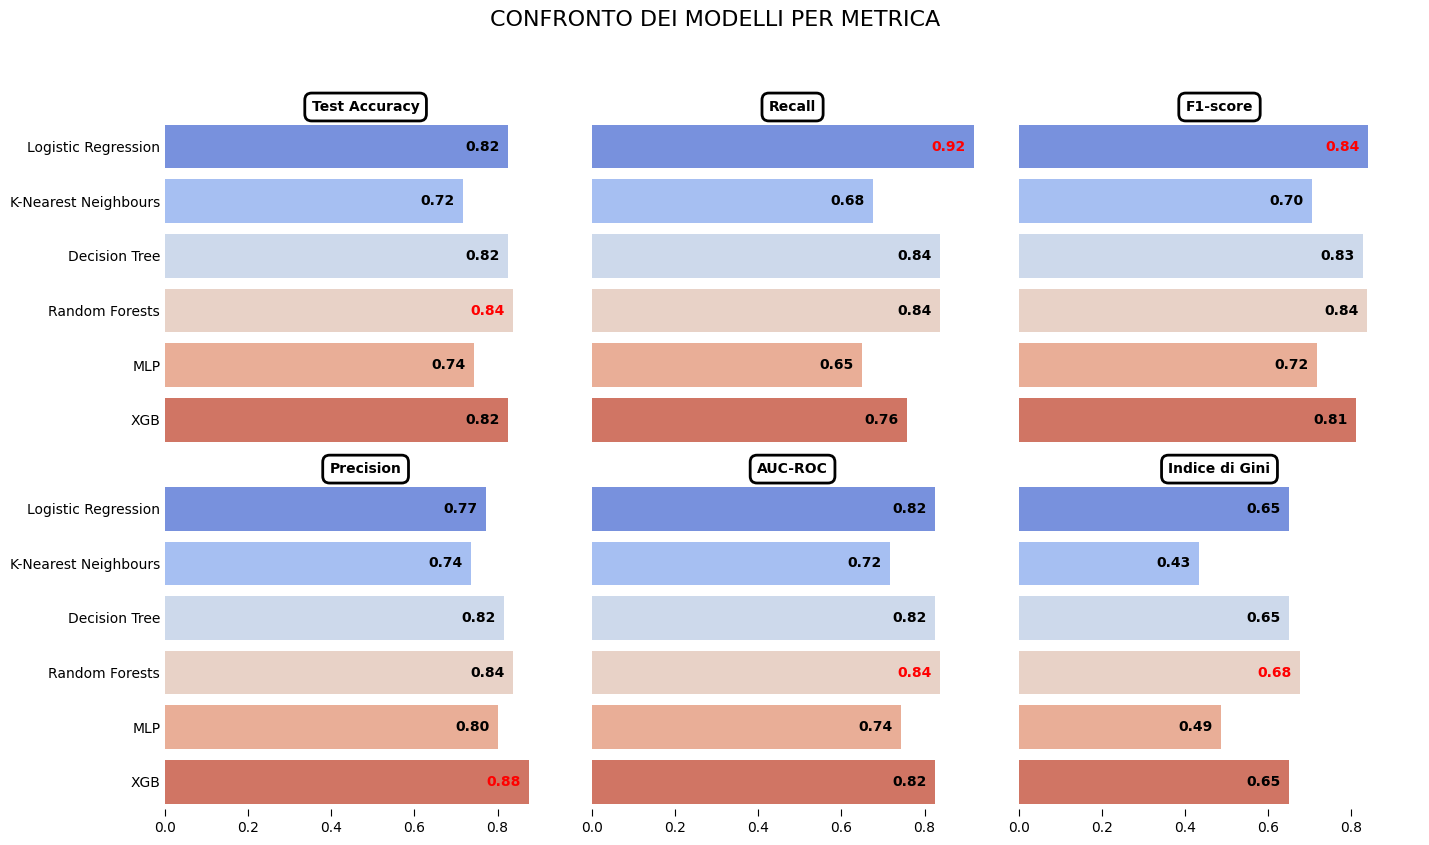

In [12]:
visualization.model_comparison_barplot(model_comparison_df)